# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
df = pd.read_csv('../bank-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 8 columns):
Unnamed: 0       518 non-null int64
interest_rate    518 non-null float64
credit           518 non-null float64
march            518 non-null float64
may              518 non-null float64
previous         518 non-null float64
duration         518 non-null float64
y                518 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 32.5+ KB


In [7]:
df.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [49]:
df_data = df.drop('Unnamed: 0', axis=1, inplace=False).copy()

In [50]:
df_data['y'] = df_data['y'].map({'no':0, 'yes':1})
df_data.head(20)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
5,0.899,0.0,0.0,1.0,0.0,126.0,0
6,4.962,0.0,0.0,0.0,0.0,84.0,0
7,4.858,0.0,1.0,0.0,0.0,17.0,0
8,4.962,0.0,0.0,0.0,0.0,704.0,1
9,4.865,0.0,0.0,0.0,0.0,185.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [54]:
y = df_data['y']
x1 = df_data[['duration','march','credit','interest_rate']]

### Simple Logistic Regression

Run the regression.

In [55]:
x = sm.add_constant(x1.values)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.347794
         Iterations 7


In [56]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Feb 2020   Pseudo R-squ.:                  0.4982
Time:                        21:18:09   Log-Likelihood:                -180.16
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 3.654e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3797      0.288      1.319      0.187      -0.185       0.944
x1             0.0070      0.001      9.428      0.000       0.006       0.008
x2            -1.8356      0.319     -5.757      0.000      -2.461      -1.211
x3             2.2200      1.075      2.065      0.039       0.113       4.327
x4            -0.8902      0.087    -10.198      0.000      -1.061      -0.719
==============================================================================
"""

### Find the odds of duration

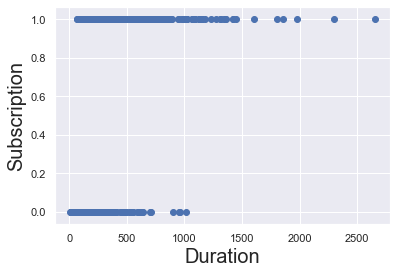

In [14]:
plt.scatter(x1,y)
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [29]:
np.exp(0.0070)

1.0070245572668486